In [56]:
import numpy as np
import utils
from importlib import reload
utils = reload(utils)
import plotting_tools as pt
pt = reload(pt)

import scipy.ndimage as sciim

In [229]:
def wrapper(time, N, suffix, tag, attribute, avg=True, cb=False, get_diff=False, mean=True, shift=None):
    
    inner=True
    
    if cb == False:
        fn = tc.get_filename(N,suffix)
    else:
        sfx = tc.cb_suffix(1,0,suffix)
        fn = tc.get_filename(N,sfx)
        
    path = tc.get_path(fn)
    arr = tc.get_arr(path, time, N, attribute, label_type='STEP', tag=tag, inner=inner, avg=avg).squeeze()
    if mean == True: arr -= arr.mean()
#     arr = arr[i2]
    if get_diff == True:
        arr1 = tc.get_arr(path, time+1, N, attribute, label_type='STEP', tag=tag, inner=inner, avg=avg).squeeze()
        if mean == True: arr1 -= arr1.mean()
#         arr1 = arr1[i2]
        
        return arr1 - arr
    else:
        return arr

# Understanding $\beta$ in the blending time-shifts
## Travelling vortex

Initialise test case scenario

In [1195]:
Nx = 128
Ny = 128
et = 1.0
N = 1

base_fn = 'output_travelling_vortex'
py_dir = '../' + base_fn + '/'

tc = utils.test_case(base_fn,py_dir,Nx,Ny,et)
i2 = tc.i2

after_half_step


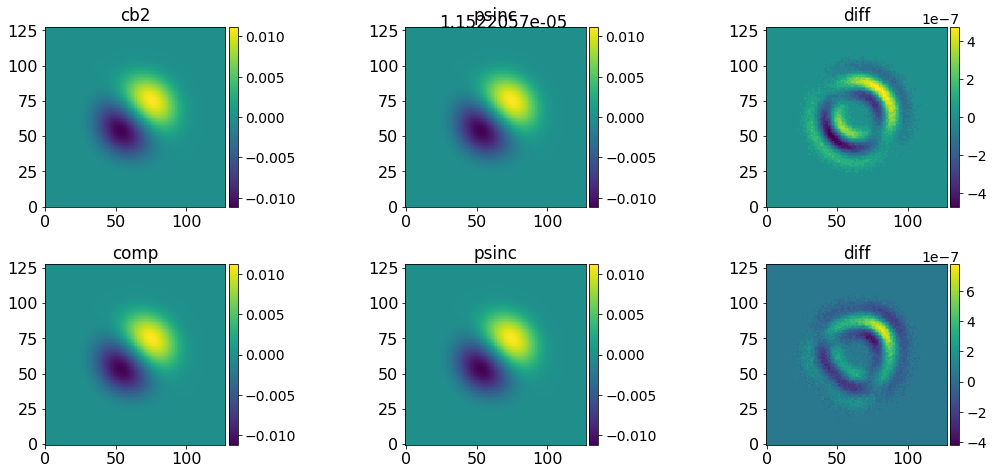

In [1015]:
attribute = 'rho'
time = 1

tags = tc.get_tag_dict()
tag = tags[5]

comp_sfx = 'comp_bal_debug'
psinc_sfx = 'psinc_debug_orig'
print(tag)

avg = False
get_diff = True
    
comp = wrapper(time, N, comp_sfx, tag, attribute, get_diff=get_diff)
psinc = wrapper(time, N, psinc_sfx, tag, attribute, get_diff=get_diff)
cb1 = wrapper(time, N, 'cb1_w=10-6_debug', tag, attribute, get_diff=get_diff, cb=True)
cb2 = wrapper(time, N, 'cb1_w=10-6_debug', tag, attribute, get_diff=get_diff, cb=True)
# cb2 = wrapper(time, 'cb1_w=0-16_debug', get_diff=get_diff, cb=True)

arr_lst = [[cb2,'cb2'],[psinc,'psinc'],[cb2-psinc,'diff']]
arr_lst += [[comp,'comp'],[psinc,'psinc'],[comp-psinc,'diff']]
norm = np.linalg.norm(cb2-psinc)
pl = pt.plotter(arr_lst, ncols=3, figsize=(15,10))
pl.plot(suptitle=norm, rect=[0, 0.03, 1, 1.01])


#########################################################
# Probe measurement
#########################################################
probe_loc = [0,0]
times = np.arange(0,356)
# times = times[220:230]
cb21_probe, cb22_probe = [], []
cb2_probe = []
#
# for time in times:
#     cb2 = wrapper(time, 'cb1_w=0-16_debug', get_diff=get_diff, cb=True)
#     ii1 = -10/16
#     cb21 = sciim.shift(cb2, ii1, mode='wrap')

#     ii2 = 9/16
#     cb22 = sciim.shift(cb2, ii2, mode='wrap')
    
#     cb21 = cb21[probe_loc[0],probe_loc[1]]
#     cb22 = cb22[probe_loc[0],probe_loc[1]]
    
#     cb21_probe.append(cb21)
#     cb22_probe.append(cb22)
#     cb2_probe.append(cb2[probe_loc[0],probe_loc[1]])

# pl = pt.plotter_1d(ncols=1,nrows=1)

# ax = pl.get_ax(0)
# ax.plot(cb2_probe, label='cb2')
# ax.plot(cb21_probe, label='cb21')
# ax.plot(cb22_probe, label='cb22')
# ax.legend()

# pl.img.show()

#########################################################


#########################################################
# Array shifts
#########################################################

# arr_lst = []
# ii1 = -10/16
# cb21 = sciim.shift(cb2, ii1, mode='wrap')

# ii2 = 9/16
# cb22 = sciim.shift(cb2, ii2, mode='wrap')
# arr_lst += [[cb21,'cb21, %.3f' %ii1],[cb22,'cb22, %.3f' %ii2],[cb21-cb22,'diff']]
# norm = np.linalg.norm(cb21-psinc)
# arr_lst += [[cb21,'cb21, %.3f' %i],[psinc,'psinc'],[cb21-psinc,'diff, %.6f' %norm]]
# norm = np.linalg.norm(cb22-psinc)
# arr_lst += [[cb22,'cb22, %.3f' %i],[psinc,'psinc'],[cb22-psinc,'diff, %.6f' %norm]]
# pl = pt.plotter(arr_lst, ncols=3, figsize=(15,15))
# pl.plot()

#########################################################


#########################################################
# Array plots with varying shifts
#########################################################
alst = np.arange(-16,17,0.01)
alst = [10.0]
# alst = np.arange(-16,17,1)
times = np.arange(1,354)
for time in times:
    psinc = wrapper(time, N, psinc_sfx, tag, attribute, get_diff=get_diff)
    cb2 = wrapper(time, N, 'cb1_w=10-6_debug', tag, attribute, get_diff=get_diff, cb=True)
#     cb2 = wrapper(time, 'cb1_w=0-16_debug', get_diff=get_diff, cb=True)
#     cb2 = wrapper(time, 'comp_bal_debug', get_diff=get_diff, cb=False)
    min_norm, min_weight = np.inf, np.inf
    for i in alst:
    #     ii = i/16
        ii = i/16
        cb2s = sciim.shift(cb2, ii, mode='wrap')
    #     arr_lst = [[cb2s,'cb2, %.3f' %i],[psinc,'psinc'],[cb2s-psinc,'diff']]
        norm = np.linalg.norm(cb2s-psinc)

    #     pl = pt.plotter(arr_lst, ncols=3, figsize=(15,5))
    #     pl.plot(suptitle=norm, rect=[0, 0.03, 1, 1.01])

        if norm < min_norm:
            min_norm = norm
            min_weight = i
            min_lst = [[cb2s,'cb2, %.3f' %i],[psinc,'psinc'],[cb2s-psinc,'diff']]

#     print(time, min_norm, min_weight, min_weight/16)
#     pl = pt.plotter(min_lst, ncols=3, figsize=(15,5))
#     pl.plot(suptitle=min_norm, rect=[0, 0.03, 1, 1.01])
    
# arr_lst = [[comp,'comp'],[psinc,'psinc'],[comp-psinc,'diff']]
# arr_lst += [[cb1,'cb1'],[psinc,'psinc'],[cb1-psinc,'diff']]
# arr_lst += [[cb2,'cb2'],[psinc,'psinc'],[cb2-psinc,'diff']]

after_full_step


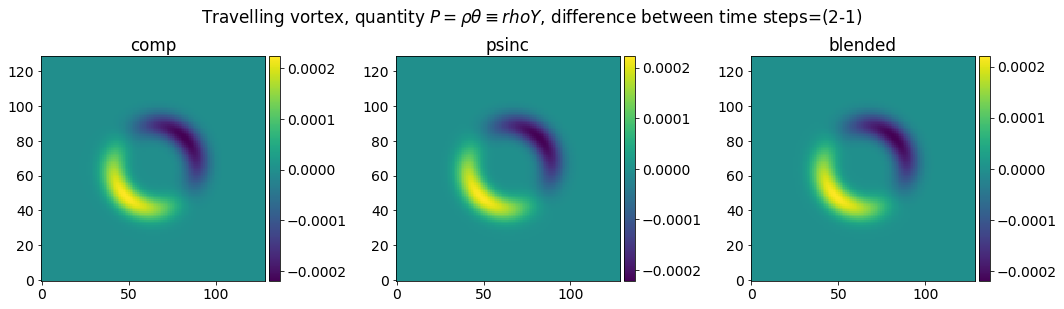

In [1112]:
attribute = 'p2_nodes'
time = 1

tags = tc.get_tag_dict()

comp_sfx = 'comp_bal_debug'
psinc_sfx = 'psinc_debug_orig'

avg = True
get_diff = True

tag = tags[9]
print(tag)
comp1 = wrapper(time, N, comp_sfx, tag, attribute, avg=avg, get_diff=get_diff)
# tag = tags[4]
# print(tag)
psinc1 = wrapper(time, N, psinc_sfx, tag, attribute, avg=avg, get_diff=get_diff)

cb1_sfx = 'cb1_w=10-6_debug'
cb1 = wrapper(time, N, cb1_sfx, tag, attribute, avg=avg, get_diff=get_diff, cb=True)

arr_lst = [[comp1,'comp'],[psinc1,'psinc'],[cb1,'blended']]
# arr_lst += [[cb1,'cb1'],[psinc1,'psinc1'],[cb1-psinc1,'diff']]

# alst = np.arange(-16.0,16.01,0.01)
# min_norm, min_weight = np.inf, np.inf
# for i in alst:
#     ii = i/16.0
#     shifted = cb1
#     shifted = sciim.shift(shifted,ii, mode ='wrap')
#     norm = np.linalg.norm(shifted-psinc1)

#     if norm < min_norm:
#         min_norm = norm
#         min_weight = i
#         min_lst = [[shifted,'shifted, %.3f' %i],[psinc1,'psinc'],[shifted-psinc1,'diff']]
#         shifted_arr = np.copy(shifted)
    
# print(min_norm, min_weight)

# arr_lst += [[shifted_arr,'shifted'],[psinc1,'psinc1'],[shifted_arr-psinc1,'diff']]

pl = pt.plotter(arr_lst, ncols=3, figsize=(15,5))
pl.plot(suptitle=r'Travelling vortex, quantity $P=\rho\theta\equiv rhoY$, difference between time steps=(%i-%i)' %(time+1, time), rect=[0, 0.03, 1, 1.03])

525 0.001958447 -14.60000000000003 -0.9125000000000019


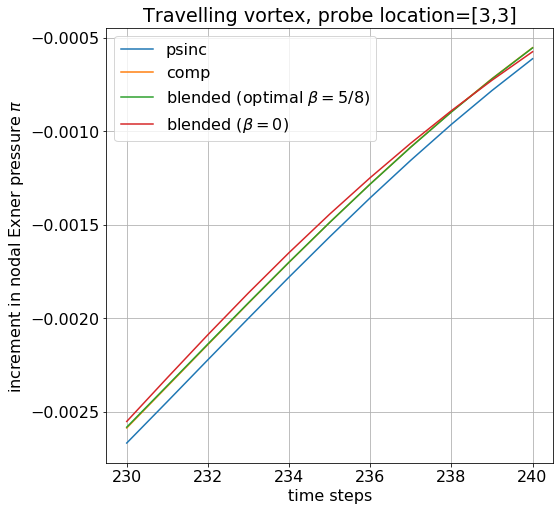

In [1165]:
Nsteps = 355
times = np.arange(0,Nsteps)
times = times[230:241]
probe_loc = [3,3]

avg = True
diff = False
attribute = 'p2_nodes'

suffix = 'comp_bal_debug'
comp = tc.get_time_series(times, N, attribute, suffix, probe_loc, cont_blend=False, ts=0, fs=0, label_type='STEP', avg=avg, diff=diff)

suffix = 'psinc_debug_orig'
psinc = tc.get_time_series(times, N, attribute, suffix, probe_loc, cont_blend=False, ts=0, fs=0, label_type='STEP', avg=avg, diff=diff)

suffix = 'cb1_w=10-6_debug'
cb1 = tc.get_time_series(times, N, attribute, suffix, probe_loc, cont_blend=True, ts=0, fs=1, label_type='STEP', avg=avg, diff=diff)

suffix = 'cb1_w=0-16_debug'
cb21 = tc.get_time_series(times, N, attribute, suffix, probe_loc, cont_blend=True, ts=0, fs=1, label_type='STEP', avg=avg, diff=diff)

alst = np.arange(-16,17,0.01)
min_norm, min_weight = np.inf, np.inf
for i in alst:
    ii = i / 16
    cb2s = sciim.shift(cb1,ii, mode ='wrap')
    norm = np.linalg.norm(cb2s-psinc)
    
    if norm < min_norm:
        min_norm = norm
        min_weight = i
        min_lst = [[cb2s,'cb2, %.3f' %i],[psinc,'psinc'],[cb2s-psinc,'diff']]
    
print(time, min_norm, min_weight, min_weight/16)

# cb21 = sciim.shift(cb21,min_weight/16)

# suffix = 'cb1_w=0-16_debug'
# cb22 = tc.get_time_series(times, N, attribute, suffix, probe_loc, cont_blend=True, ts=0, fs=1, label_type='STEP', avg=avg, diff=diff)
# cb22 = sciim.shift(cb22,-10/16)


pl = pt.plotter_1d(ncols=1,nrows=1,figsize=(8,8))

t_axs = times
ax = pl.get_ax(0)
ax.plot(t_axs,psinc, label='psinc')
ax.plot(t_axs,comp, label='comp')
ax.plot(t_axs,cb1, label=r'blended (optimal $\beta=5/8$)')
ax.plot(t_axs,cb21, label=r'blended ($\beta=0$)')
ax.set_xlabel("time steps")
ax.set_ylabel(r'increment in nodal Exner pressure $\pi$')
ax.grid()
# ax.plot(cb22, label='cb22')
ax.legend()
pl.img.title('Travelling vortex, probe location=[%i,%i]' %(3,3))
# ax.set_xlim([200,250])

pl.img.show()

after_half_step
before_advect
9.801195e-06 5.679999999999538 0.3549999999999711


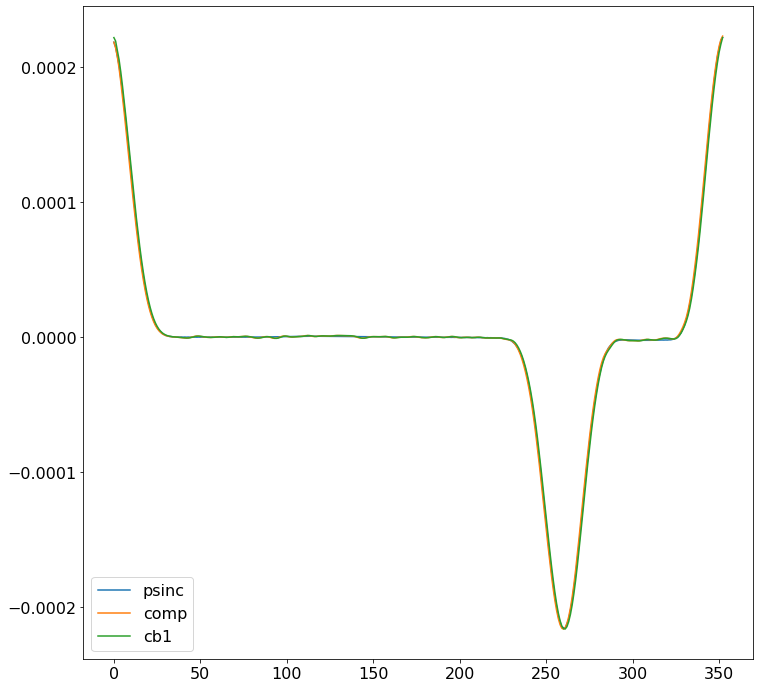

In [1037]:
Nsteps = 355
times = np.arange(0,Nsteps)
# times = times[210:240]
times = times[1:]
probe_loc = [47,47]

avg = True
diff = True

suffix = 'comp_bal_debug'
# suffix = 'psinc_debug_orig'
tag = tags[5]
print(tag)
comp = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=False, ts=0, fs=0, label_type='STEP', avg=avg, diff=diff)

suffix = 'psinc_debug_orig'
tag = tags[1]
print(tag)
psinc = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=False, ts=0, fs=0, label_type='STEP', avg=avg, diff=diff)

suffix = 'cb1_w=10-6_debug'
tag = tags[1]
cb1 = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=True, ts=0, fs=1, label_type='STEP', avg=avg, diff=diff)

suffix = 'cb1_w=0-16_debug'
cb21 = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=True, ts=0, fs=1, label_type='STEP', avg=avg, diff=diff)

alst = np.arange(-16,16.01,0.01)
min_norm, min_weight = np.inf, np.inf
for i in alst:
    ii = i / 16
    
    shifted = comp
#     shifted = np.pad(shifted,2,mode='wrap')
#     print(comp)
#     print(shifted)
    shifted = sciim.shift(shifted,ii, mode ='wrap')
#     print(shifted)
#     shifted_ = np.copy(shifted)
#     shifted = shifted[2:-2]
    
    norm = np.linalg.norm(shifted-psinc)
    
    if norm < min_norm:
        min_norm = norm
        min_weight = i
        min_lst = [[shifted,'cb2, %.3f' %i],[psinc,'psinc'],[shifted-psinc,'diff']]
        shifted0 = np.copy(shifted)
#     assert(0)
    
print(min_norm, min_weight, min_weight/16)

cb1 = sciim.shift(shifted0,min_weight/16,mode='wrap')

# suffix = 'cb1_w=0-16_debug'
# cb22 = tc.get_time_series(times, N, attribute, suffix, probe_loc, cont_blend=True, ts=0, fs=1, label_type='STEP', avg=avg, diff=diff)
# cb22 = sciim.shift(cb22,-10/16)

pl = pt.plotter_1d(ncols=1,nrows=1)

ax = pl.get_ax(0)
ax.plot(psinc, label='psinc')
ax.plot(comp, label='comp')
ax.plot(cb1, label='cb1')
# ax.plot(cb21, label='cb21')
# ax.plot(cb22, label='cb22')
ax.legend()
# ax.set_xlim([200,250])

pl.img.show()

In [1201]:
Nsteps = 355
times = np.arange(0,Nsteps)
times = times[1:]
mws = []
mws_comp = []
attribute = 'p2_nodes'

idxs = np.arange(128)
for idx in idxs:
    probe_loc = [idx,idx]

    avg = True
    diff = False

    suffix = 'comp_bal_debug'
    tag = tags[4]
    comp = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=False, ts=0, fs=0, label_type='STEP', avg=avg, diff=diff)

    suffix = 'psinc_debug_orig'
#     tag = tags[9]
    psinc = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=False, ts=0, fs=0, label_type='STEP', avg=avg, diff=diff)

    suffix = 'cb1_w=10-6_debug'
#     tag = tags[5]
    cb1 = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=True, ts=0, fs=1, label_type='STEP', avg=avg, diff=diff)

    alst = np.arange(-16,16.01,0.01)
    min_norm, min_weight = np.inf, np.inf
    min_norm_comp, min_weight_comp = np.inf, np.inf
    for i in alst:
        ii = i / 16
        shifted_comp = comp
        shifted = cb1
#         shifted = np.pad(shifted,[2,2],mode='wrap')
        shifted_comp = sciim.shift(shifted_comp,ii, mode ='wrap')
        shifted = sciim.shift(shifted,ii, mode ='wrap')

#         shifted = shifted[2:-2]

        norm_comp = np.linalg.norm(shifted_comp-psinc)
        norm = np.linalg.norm(shifted-psinc)

        if norm_comp < min_norm_comp:
            min_norm_comp = norm_comp
            min_weight_comp = i
            min_lst_comp = [[shifted_comp,'cb2, %.3f' %i],[psinc,'psinc'],[shifted_comp-psinc,'diff']]
            shifted0_comp = np.copy(shifted_comp)
            
        if norm < min_norm:
            min_norm = norm
            min_weight = i
            min_lst = [[shifted,'cb2, %.3f' %i],[psinc,'psinc'],[shifted-psinc,'diff']]
            shifted0 = np.copy(shifted)

    print(idx, min_norm, min_weight, min_norm_comp, min_weight_comp)
    mws.append(min_weight)
    mws_comp.append(min_weight_comp)

0 5.0539536e-05 1.9399999999996176 5.1923787e-05 1.7999999999996206
1 4.9531096e-05 1.929999999999616 5.3794178e-05 1.8399999999996197
2 4.8515714e-05 1.929999999999616 5.6026136e-05 1.8699999999996209
3 4.74917e-05 1.919999999999618 5.8226826e-05 1.8999999999996184
4 4.645299e-05 1.8999999999996184 6.0186856e-05 1.929999999999616
5 4.5375848e-05 1.8899999999996169 6.186526e-05 1.9499999999996191
6 4.4265875e-05 1.8699999999996209 6.333291e-05 1.9699999999996152
7 4.318683e-05 1.8599999999996193 6.467466e-05 1.9999999999996163
8 4.2264153e-05 1.8499999999996177 6.596349e-05 2.019999999999616
9 4.1646137e-05 1.8499999999996177 6.724528e-05 2.0399999999996155
10 4.1458385e-05 1.8499999999996177 6.850598e-05 2.0399999999996155
11 4.17794e-05 1.8599999999996193 6.963805e-05 2.0299999999996174
12 4.2602773e-05 1.8599999999996193 7.043553e-05 2.0099999999996143
13 4.3784035e-05 1.8599999999996193 7.0673486e-05 1.9799999999996167
14 4.5066947e-05 1.8599999999996193 7.019877e-05 1.949999999999

118 4.6416528e-05 1.8599999999996193 6.7509805e-05 1.9499999999996191
119 4.7600195e-05 1.8899999999996169 6.621759e-05 1.90999999999962
120 4.8966445e-05 1.90999999999962 6.464018e-05 1.8699999999996209
121 5.035846e-05 1.929999999999616 6.2645304e-05 1.8299999999996217
122 5.1591884e-05 1.9499999999996191 6.020027e-05 1.7899999999996226
123 5.2497595e-05 1.9599999999996172 5.743295e-05 1.7599999999996214
124 5.2942378e-05 1.9599999999996172 5.4655062e-05 1.7399999999996218
125 5.2867967e-05 1.9599999999996172 5.234534e-05 1.7299999999996203
126 5.234034e-05 1.9499999999996191 5.0990835e-05 1.7399999999996218
127 5.151066e-05 1.9499999999996191 5.0870844e-05 1.7699999999996194


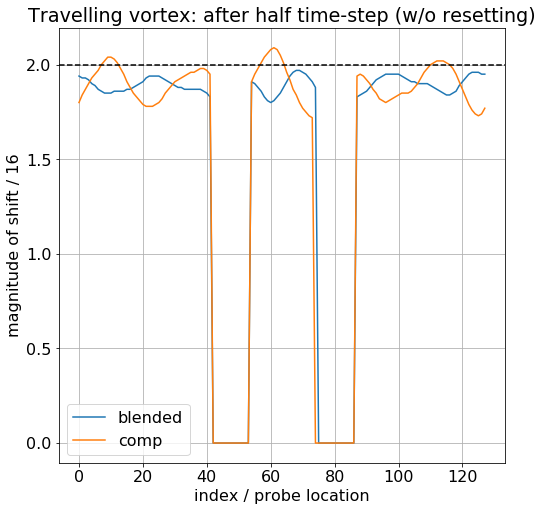

1.5403124999996263


In [1204]:
mws0 = np.copy(mws)
mws0_comp = np.copy(mws_comp)

pl = pt.plotter_1d(nrows=1,ncols=1,figsize=(8,8))
ax = pl.get_ax(0)
ax.plot(mws, label='blended')
ax.plot(mws_comp, label='comp')
ax.axhline(2.0, ls='--', c='k')
ax.set_xlabel("index / probe location")
ax.set_ylabel("magnitude of shift / 16")
ax.set_title("Travelling vortex: after half time-step (w/o resetting)")
ax.legend()
ax.grid()
# ax.axvline(46)
# ax.axvline(80)
pl.img.show()
print(np.mean(mws))

## Rising bubble

In [1174]:
Nx = 100
Ny = 50
et = 10.0
N = 1

base_fn = 'output_rising_bubble'
py_dir = '../' + base_fn + '/'

tc = utils.test_case(base_fn,py_dir,Nx,Ny,et)
i2 = tc.i2

after_full_step


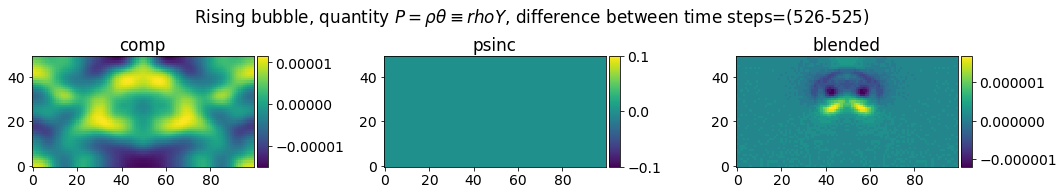

In [1126]:
time = 525

tags = tc.get_tag_dict()

comp_sfx = 'comp_debug'
psinc_sfx = 'psinc_debug'

attribute = 'rhoY'

avg = False
get_diff = True

tag = tags[9]
# tag = 'ic'
print(tag)
comp1 = wrapper(time, N, comp_sfx, tag, attribute, avg=avg, get_diff=get_diff).T
psinc1 = wrapper(time, N, psinc_sfx, tag, attribute, avg=avg, get_diff=get_diff).T

cb1_sfx = tc.cb_suffix(1,0,'cb1_w=0-16_debug')
cb1 = wrapper(time, N, cb1_sfx, tag, attribute, avg=avg, get_diff=get_diff).T

arr_lst = [[comp1,'comp'],[psinc1,'psinc'],[cb1,'blended']]
# arr_lst = [[comp1,'comp1'],[psinc1,'psinc1'],[comp1-psinc1,'diff']]
# arr_lst += [[cb1,'cb1'],[psinc1,'psinc1'],[cb1-psinc1,'diff']]
# arr_lst += [[cb1,'cb1'],[comp1,'comp1'],[comp1-cb1,'diff']]
# arr_lst += [[comp1-cb1,'cb1'],[comp1-psinc1,'comp1'],[(comp1-psinc1)-(comp1-cb1),'diff']]
norm = np.linalg.norm(comp1-psinc1)
pl = pt.plotter(arr_lst, ncols=3, figsize=(15,3))
pl.plot(suptitle=r'Rising bubble, quantity $P=\rho\theta\equiv rhoY$, difference between time steps=(%i-%i)' %(time+1, time), rect=[0, 0.03, 1, 0.96])

after_full_step


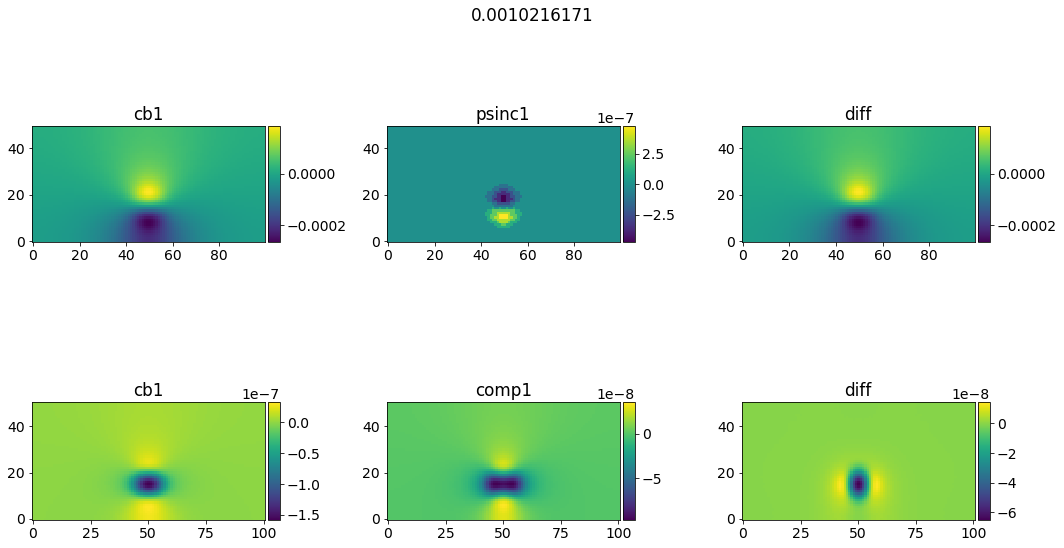

In [951]:
time = 0

tags = tc.get_tag_dict()

comp_sfx = 'comp_debug'
psinc_sfx = 'psinc_debug'

attribute = 'rho'

avg = False
get_diff = True

tag = tags[9]
print(tag)
comp1 = wrapper(time, N, comp_sfx, tag, attribute, avg=avg, get_diff=get_diff).T
psinc1 = wrapper(time, N, psinc_sfx, tag, attribute, avg=avg, get_diff=get_diff).T

cb1_sfx = tc.cb_suffix(1,0,'cb1_w=0-16_debug')
cb1 = wrapper(time, N, cb1_sfx, tag, attribute, avg=avg, get_diff=get_diff).T

# arr_lst = [[comp1,'comp1'],[psinc1,'psinc1'],[comp1-psinc1,'diff']]
arr_lst = [[cb1,'cb1'],[psinc1,'psinc1'],[cb1-psinc1,'diff']]

attribute = 'p2_nodes'
psinc2 = wrapper(time, N, psinc_sfx, tag, attribute, avg=avg, get_diff=get_diff).T

cb2_sfx = tc.cb_suffix(1,0,'cb1_w=0-16_debug')
cb2 = wrapper(time, N, cb2_sfx, tag, attribute, avg=avg, get_diff=get_diff).T

arr_lst += [[cb2,'cb1'],[psinc2,'comp1'],[cb2-psinc2,'diff']]

# arr_lst += [[comp1-cb1,'cb1'],[cb1-(cb1-psinc1),'comp1'],[cb2-(cb1-psinc1),'diff']]
norm = np.linalg.norm(comp1-psinc1)
pl = pt.plotter(arr_lst, ncols=3, figsize=(15,13))
pl.plot(suptitle=norm, rect=[0, 0.03, 1, 0.96])

after_full_step
after_full_step
4.5488065e-05 -3.410605131648481e-13 -2.1316282072803006e-14


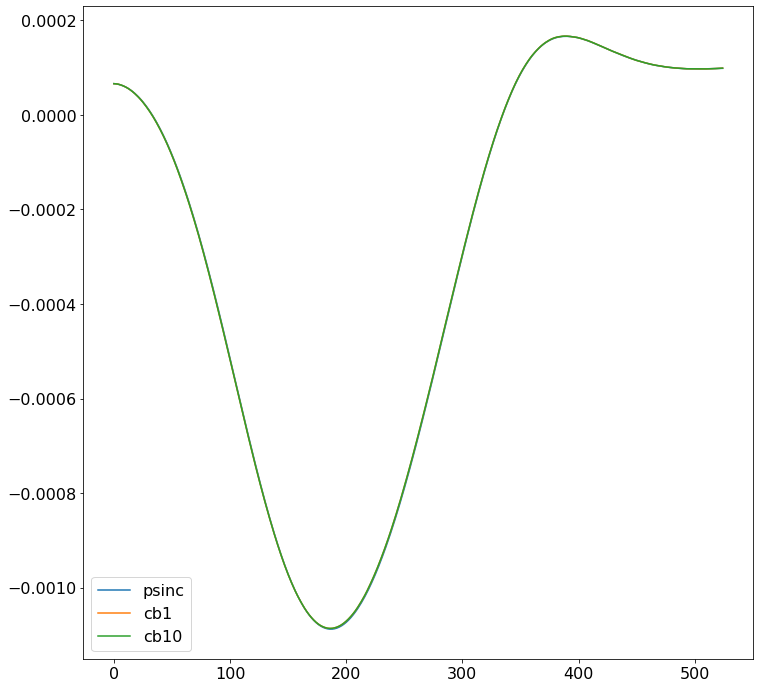

In [1185]:
Nsteps = 526
times = np.arange(0,Nsteps)
times = times[1:]
# times = times[210:240]
probe_loc = [50,16]

avg = True
diff = False

attribute = 'p2_nodes'

suffix = 'comp_debug'
# suffix = 'psinc_debug_orig'
tag = tags[9]
print(tag)
comp = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=False, ts=0, fs=0, label_type='STEP', avg=avg, diff=diff)

suffix = 'psinc_debug'
tag = tags[9]
print(tag)
psinc = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=False, ts=0, fs=0, label_type='STEP', avg=avg, diff=diff)

suffix = 'cb1_w=0-16_debug'
tag = tags[9]
cb1 = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=True, ts=0, fs=1, label_type='STEP', avg=avg, diff=diff)

alst = np.arange(-16,16.01,0.01)
min_norm, min_weight = np.inf, np.inf
for i in alst:
    ii = i / 16
    cb2s = sciim.shift(cb1,ii, mode ='constant')
    norm = np.linalg.norm(cb2s-psinc)
    
    if norm < min_norm:
        min_norm = norm
        min_weight = i
        min_lst = [[cb2s,'cb2, %.3f' %i],[psinc,'psinc'],[cb2s-psinc,'diff']]
    
print(min_norm, min_weight, min_weight/16)

cb10 = np.copy(cb1)
cb1 = sciim.shift(cb1, min_weight/16)

# suffix = 'cb1_w=0-16_debug'
# cb22 = tc.get_time_series(times, N, attribute, suffix, probe_loc, cont_blend=True, ts=0, fs=1, label_type='STEP', avg=avg, diff=diff)
# cb22 = sciim.shift(cb22,-10/16)

pl = pt.plotter_1d(ncols=1,nrows=1)

ax = pl.get_ax(0)
ax.plot(psinc, label='psinc')
# ax.plot(comp, label='comp')
ax.plot(cb1, label='cb1')
ax.plot(cb10, label='cb10')
# ax.plot(cb21, label='cb21')
# ax.plot(cb22, label='cb22')
ax.legend()
# ax.set_xlim([200,250])

pl.img.show()

In [1191]:
Nsteps = 526
times = np.arange(0,Nsteps)
times = times[5:]
idxs = np.arange(0,50)

attribute = 'p2_nodes'
mws = []
for idx in idxs:
    probe_loc = [50,idx]

    avg = True
    diff = False

    suffix = 'psinc_debug'
    tag = tags[9]
    psinc = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=False, ts=0, fs=0, label_type='STEP', avg=avg, diff=diff)

    suffix = 'cb1_w=0-16_debug'
#     tag = tags[9]
    cb1 = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=True, ts=0, fs=1, label_type='STEP', avg=avg, diff=diff)

#     suffix = 'comp_debug'
# #     tag = tags[9]
#     cb1 = tc.get_time_series(times, N, attribute, suffix, probe_loc, tag=tag, cont_blend=False, ts=0, fs=0, label_type='STEP', avg=avg, diff=diff)

    alst = np.arange(-16,16.1,0.1)
    min_norm, min_weight = np.inf, np.inf
    for i in alst:
        ii = i / 16
        cb2s = sciim.shift(cb1,ii, mode ='constant')
        norm = np.linalg.norm(cb2s-psinc)

        if norm <= min_norm:
            min_norm = norm
            min_weight = i
            min_lst = [[cb2s,'cb2, %.3f' %i],[psinc,'psinc'],[cb2s-psinc,'diff']]

    print(idx, min_norm, min_weight, min_weight/16)
    mws.append(min_weight)

0 9.735584e-06 -5.684341886080802e-14 -3.552713678800501e-15
1 9.758898e-06 -5.684341886080802e-14 -3.552713678800501e-15
2 1.0239806e-05 -5.684341886080802e-14 -3.552713678800501e-15
3 1.0328899e-05 -5.684341886080802e-14 -3.552713678800501e-15
4 1.0965401e-05 -5.684341886080802e-14 -3.552713678800501e-15
5 1.1484407e-05 -5.684341886080802e-14 -3.552713678800501e-15
6 1.2731519e-05 -5.684341886080802e-14 -3.552713678800501e-15
7 1.3720333e-05 -5.684341886080802e-14 -3.552713678800501e-15
8 1.4832519e-05 -5.684341886080802e-14 -3.552713678800501e-15
9 1.5459063e-05 -5.684341886080802e-14 -3.552713678800501e-15
10 1.6390159e-05 -5.684341886080802e-14 -3.552713678800501e-15
11 1.7684584e-05 -5.684341886080802e-14 -3.552713678800501e-15
12 2.041806e-05 -5.684341886080802e-14 -3.552713678800501e-15
13 2.464145e-05 -5.684341886080802e-14 -3.552713678800501e-15
14 3.05213e-05 -5.684341886080802e-14 -3.552713678800501e-15
15 3.7633567e-05 -5.684341886080802e-14 -3.552713678800501e-15
16 4.548

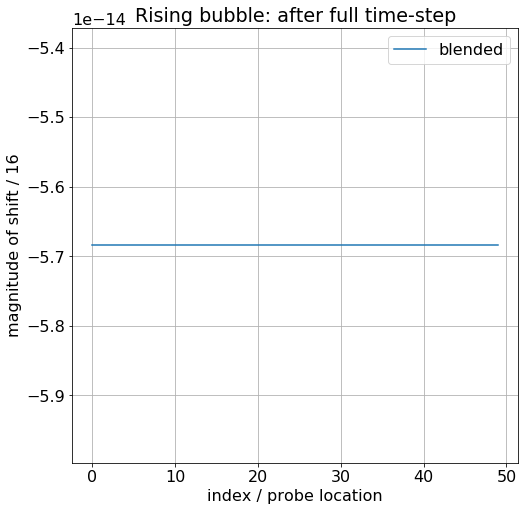

-5.684341886080802e-14


In [1194]:
mws0 = np.copy(mws)
# mws0_comp = np.copy(mws_comp)

pl = pt.plotter_1d(nrows=1,ncols=1,figsize=(8,8))
ax = pl.get_ax(0)
ax.plot(mws, label='blended')
# ax.plot(mws_comp, label='comp')
# ax.axhline(0.0, ls='--', c='k')
ax.set_xlabel("index / probe location")
ax.set_ylabel("magnitude of shift / 16")
ax.set_title("Rising bubble: after full time-step")
ax.legend()
ax.grid()
# ax.axvline(46)
# ax.axvline(80)
pl.img.show()
print(np.mean(mws))

# Skamarock / Klemp waves

In [3]:
Nx = 301
Ny = 10
et = 30.0
N = 1

base_fn = 'output_internal_long_wave'
py_dir = '../' + base_fn + '/'

tc = utils.test_case(base_fn,py_dir,Nx,Ny,et)
i2 = tc.i2

after_full_step


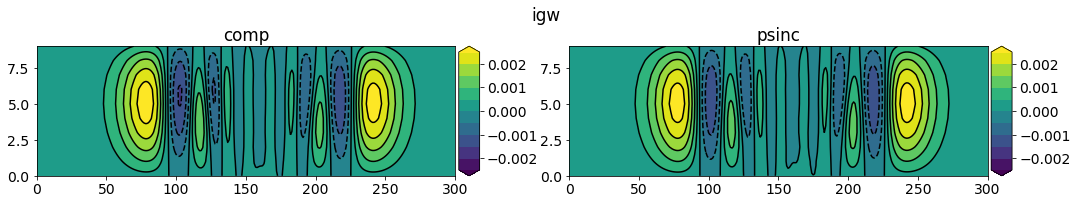

In [260]:
time = 66
Tref = 300.0

tags = tc.get_tag_dict()
scales = ['standard', 'long', 'planetary']
scale = scales[0]

# comp_sfx = '%s_comp_debug' %scale
comp_sfx = '%s_comp' %scale
# psinc_sfx = '%s_psinc_debug' %scale
psinc_sfx = '%s' %scale

attributes = ['rho','rhou','rhov','buoy','rhoY','p2_nodes']
attributes = ['dY']
avg = False
get_diff = False

tag = tags[9]
# tag = 'ic'
print(tag)
for attribute in attributes:
    comp1 = wrapper(time, N, comp_sfx, tag, attribute, avg=avg, get_diff=get_diff,mean=False).T
    psinc1 = wrapper(time, N, psinc_sfx, tag, attribute, avg=avg, get_diff=get_diff,mean=False).T

    # comp1 /= wrapper(time, N, comp_sfx, tag, attributes[1], avg=avg, get_diff=get_diff).T
    # psinc1 /= wrapper(time, N, psinc_sfx, tag, attributes[1], avg=avg, get_diff=get_diff).T

    comp1 *= Tref
    psinc1 *= Tref

    # cb1_sfx = tc.cb_suffix(1,0,'%s_w=0-16_debug' %scale)
    # cb1 = wrapper(time, N, cb1_sfx, tag, attribute, avg=avg, get_diff=get_diff).T

    arr_lst = [[comp1,'comp'],[psinc1,'psinc']]
#     arr_lst = [[comp1-psinc1,'%s diff' %attribute]]
    # arr_lst = [[comp1,'comp1'],[psinc1,'psinc1'],[comp1-psinc1,'diff']]
    # arr_lst += [[cb1,'cb1'],[psinc1,'psinc1'],[cb1-psinc1,'diff']]
    # arr_lst += [[cb1,'cb1'],[comp1,'comp1'],[comp1-cb1,'diff']]
    # arr_lst += [[comp1-cb1,'cb1'],[comp1-psinc1,'comp1'],[(comp1-psinc1)-(comp1-cb1),'diff']]
    #     norm = np.linalg.norm(comp1-psinc1)
    pl = pt.plotter(arr_lst, ncols=2, figsize=(15,3))

    lvls = np.arange(-0.0025,0.0025+0.0005,0.0005)
    # lvls = np.arange(0.0,0.01,0.001)
#     lvls = np.arange(comp1.min(),comp1.max(),0.005)
#     pl.plot(suptitle=r'igw', rect=[0, 0.03, 1, 0.96])
    pl.plot(suptitle=r'igw', rect=[0, 0.03, 1, 0.96], method='contour',lvls=lvls)

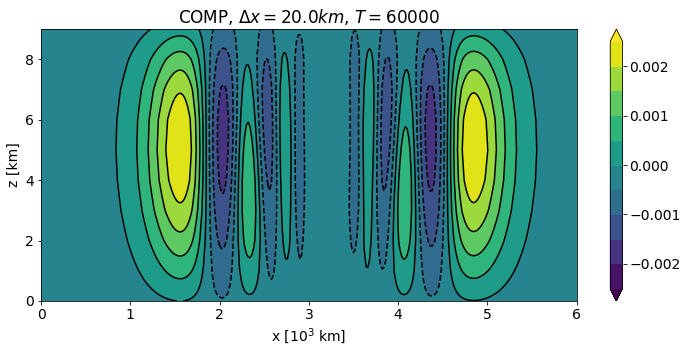

In [258]:
import matplotlib.pyplot as plt
wave_type = '_long'
if wave_type == '_long':
    dx = '20.0'
    T = '60000'
    ticks = [0,1,2,3,4,5,6] # long wave
    lvls = np.arange(-0.0025,0.00251,0.0005)
#     lvls = np.arange(-0.005,0.005,0.001)
    
    
fig = plt.figure(figsize=(12,5))
# plt.contour(c.dY[2:-2,2:-2].T * 300.,levels=lvls,colors='k')
# plt.contourf(c.dY[2:-2,2:-2].T * 300.,levels=lvls,extend='both')
plt.contour(psinc1,levels=lvls,colors='k')
plt.contourf(psinc1,levels=lvls,extend='both')
plt.colorbar()
plt.title("COMP, $\Delta x = %s km$, $T = %s$" %(dx,T))

plt.xticks(np.arange(0,301,50),ticks)
plt.yticks(np.arange(0,10,2),[0,2,4,6,8,10])
plt.xlabel('x [$10^3$ km]')
plt.ylabel('z [km]')

plt.show()

In [259]:
print(psinc1)

[[-0.00031323 -0.00031348 -0.00031369 ... -0.00031227 -0.00031263
  -0.00031295]
 [-0.0002942  -0.00029497 -0.00029564 ... -0.00029112 -0.00029228
  -0.0002933 ]
 [-0.00027615 -0.00027744 -0.00027853 ... -0.00027106 -0.00027298
  -0.00027467]
 ...
 [-0.00026207 -0.00026377 -0.00026522 ... -0.00025525 -0.00025782
  -0.00026009]
 [-0.00028101 -0.00028218 -0.00028318 ... -0.00027632 -0.0002781
  -0.00027965]
 [-0.0003065  -0.00030695 -0.00030733 ... -0.0003047  -0.00030538
  -0.00030598]]
